<a href="https://colab.research.google.com/github/HauwaUmar/DATA-6100/blob/main/Project1_firstdraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor 
from sklearn import preprocessing
from sklearn.decomposition import PCA

IMPORT DATASET

In [3]:
# LOADING TEST AND TRAIN DATASET
train_dataset = pd.read_csv("/content/train.csv")
test_dataset = pd.read_csv("/content/test.csv")


In [4]:
train_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
test_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [6]:
X_train_dataset = train_dataset.drop(['SalePrice'],axis = 1)
Y_train_dataset = train_dataset['SalePrice']

In [7]:
# combining train and test dataset for cleaning and pre processing
whole_dataset = pd.concat((X_train_dataset, test_dataset)).reset_index(drop = True)


DATA ANALYSIS / CLEANING

In [8]:
# check for number of missing values in each column
missing_cols_whole_dataset = whole_dataset.isnull().sum()
pd.set_option('display.max_rows', missing_cols_whole_dataset.shape[0]+1)
missing_cols_whole_dataset

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
# this function shows the percentage of missing values 
def info_on_missing_values(df):
    total_missing_values = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percentage = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    data_type = df.dtypes.sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    decription_of_missing_values = pd.concat([total_missing_values, percentage, data_type], axis=1, keys=['Total Missing Val','Percentage','Data Type'])
    return decription_of_missing_values


In [10]:
info_on_missing_values(whole_dataset)

,Total Missing Val,Percentage,Data Type
PoolQC,2909,99.66,object
MiscFeature,2814,96.40,object
Alley,2721,93.22,object
Fence,2348,80.44,object
FireplaceQu,1420,48.65,object
LotFrontage,486,16.65,float64
GarageYrBlt,159,5.45,float64
GarageFinish,159,5.45,object
GarageQual,159,5.45,object
GarageCond,159,5.45,object


In [11]:
whole_dataset.shape

(2919, 80)

In [12]:
# dropping columns with 70% value missing 
whole_dataset = whole_dataset.dropna(axis=1,thresh=0.7*len(whole_dataset))
whole_dataset.shape

(2919, 75)

In [13]:
info_on_missing_values(whole_dataset)

,Total Missing Val,Percentage,Data Type
LotFrontage,486,16.65,float64
GarageYrBlt,159,5.45,float64
GarageFinish,159,5.45,object
GarageQual,159,5.45,object
GarageCond,159,5.45,object
GarageType,157,5.38,object
BsmtExposure,82,2.81,object
BsmtCond,82,2.81,object
BsmtQual,81,2.77,object
BsmtFinType2,80,2.74,object


OBSERVATION: Some columns have only few values missing. It is fair to fill those with 0's or 'None

In [14]:
# filling columns with missing values less than 5 with 0 or None depending on datatype
missing_val_cols = whole_dataset.columns[whole_dataset.isna().any()]

for col in missing_val_cols:
    if whole_dataset[col].isnull().sum() <5:
        if whole_dataset[col].dtype == 'object':
            whole_dataset[col]= whole_dataset[col].fillna('None')
        else:
            whole_dataset[col] = whole_dataset[col].fillna(0)


In [15]:
info_on_missing_values(whole_dataset)

,Total Missing Val,Percentage,Data Type
LotFrontage,486,16.65,float64
GarageYrBlt,159,5.45,float64
GarageFinish,159,5.45,object
GarageQual,159,5.45,object
GarageCond,159,5.45,object
GarageType,157,5.38,object
BsmtCond,82,2.81,object
BsmtExposure,82,2.81,object
BsmtQual,81,2.77,object
BsmtFinType2,80,2.74,object


GOING THROUGH EACH COLUMN WITH MISSING DATA

In [16]:
# FOR LOTFRONTAGE
whole_dataset['LotFrontage'].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

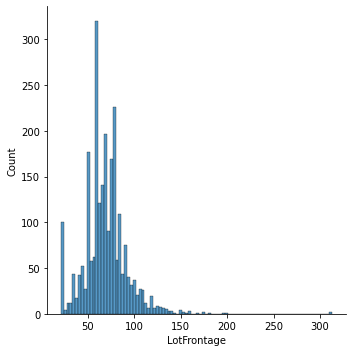

In [17]:
sns.displot(whole_dataset['LotFrontage'])

In [18]:
#looking for correlation between LotFrontage and other columns
whole_dataset.corr()['LotFrontage'].nlargest(3)

LotFrontage    1.000000
LotArea        0.489896
1stFlrSF       0.458247
Name: LotFrontage, dtype: float64

In [19]:
# no column has significant correlation with LotFrontage
# assigning mean value to miss value for LotFrontage
whole_dataset['LotFrontage'] = whole_dataset['LotFrontage'].fillna(whole_dataset['LotFrontage'].mean())

In [20]:
# for MasVnrType
whole_dataset['MasVnrType'].describe()

count     2895
unique       4
top       None
freq      1742
Name: MasVnrType, dtype: object

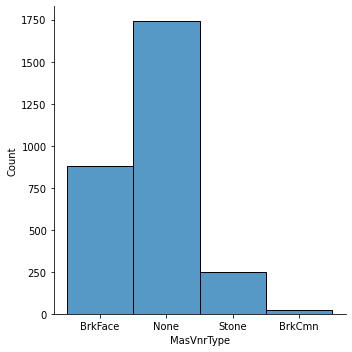

In [21]:
sns.displot(whole_dataset['MasVnrType'])

In [22]:
# none has the most frequency. i will use that to fill the missing data. 
whole_dataset['MasVnrType']= whole_dataset['MasVnrType'].fillna(whole_dataset['MasVnrType'].mode()[0])

In [23]:
# for MasVnrArea
whole_dataset['MasVnrArea'].describe()

count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

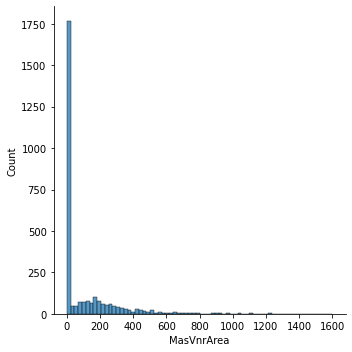

In [24]:
sns.displot(whole_dataset['MasVnrArea'])

In [25]:
#assigning mode to MasVnrArea
whole_dataset['MasVnrArea']= whole_dataset['MasVnrArea'].fillna(whole_dataset['MasVnrArea'].mode()[0])

In [26]:
# FOR BsmtQual
whole_dataset['BsmtQual'].describe()

count     2838
unique       4
top         TA
freq      1283
Name: BsmtQual, dtype: object

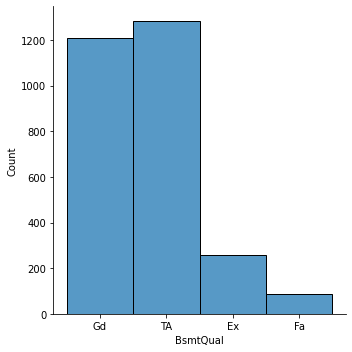

In [27]:
sns.displot(whole_dataset['BsmtQual'])

In [28]:
# I WILL FILL WITH NONE BECAUSE ACCORDING TO THE DATA SET DESCRIPTION NA MEANS NONE
whole_dataset['BsmtQual']= whole_dataset['BsmtQual'].fillna('None')


In [29]:
# For BsmtCond
whole_dataset['BsmtCond'].describe()

count     2837
unique       4
top         TA
freq      2606
Name: BsmtCond, dtype: object

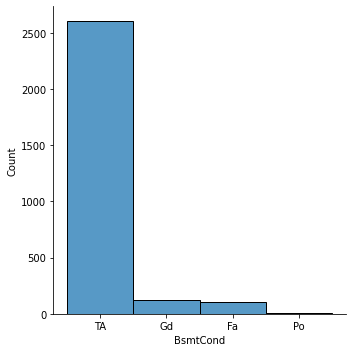

In [30]:
sns.displot(whole_dataset['BsmtCond'])

In [31]:
# I WILL FILL WITH NONE BECAUSE ACCORDING TO THE DATA SET DESCRIPTION NA MEANS NONE
whole_dataset['BsmtCond']= whole_dataset['BsmtCond'].fillna('None')


In [32]:
# for BsmtExposure
whole_dataset['BsmtExposure'].describe()

count     2837
unique       4
top         No
freq      1904
Name: BsmtExposure, dtype: object

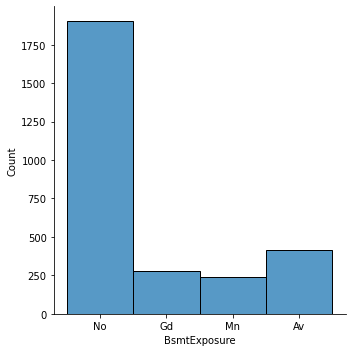

In [33]:
sns.displot(whole_dataset['BsmtExposure'])

In [34]:
whole_dataset['BsmtExposure']= whole_dataset['BsmtExposure'].fillna(whole_dataset['BsmtExposure'].mode()[0])

In [35]:
#for BsmtFinType1
whole_dataset['BsmtFinType1'].describe()

count     2840
unique       6
top        Unf
freq       851
Name: BsmtFinType1, dtype: object

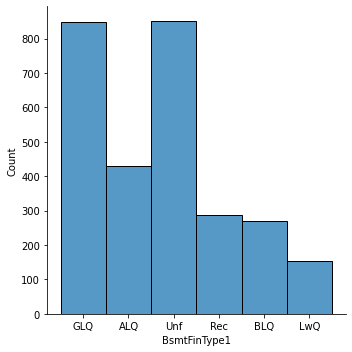

In [36]:
sns.displot(whole_dataset['BsmtFinType1'])


In [37]:
# I WILL FILL WITH NONE BECAUSE ACCORDING TO THE DATA SET DESCRIPTION NA MEANS NONE
whole_dataset['BsmtFinType1']= whole_dataset['BsmtFinType1'].fillna('None')


In [38]:
# for BsmtFinType2
whole_dataset['BsmtFinType2'].describe()

count     2839
unique       6
top        Unf
freq      2493
Name: BsmtFinType2, dtype: object

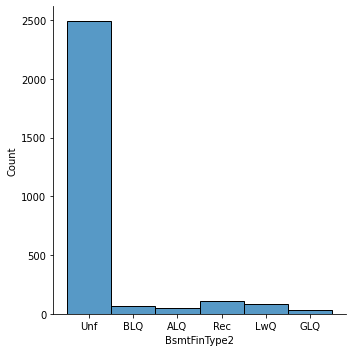

In [39]:
sns.displot(whole_dataset['BsmtFinType2'])

In [40]:
# I WILL FILL WITH NONE BECAUSE ACCORDING TO THE DATA SET DESCRIPTION NA MEANS NONE
whole_dataset['BsmtFinType2']= whole_dataset['BsmtFinType2'].fillna('None')

In [41]:
# for GarageType
whole_dataset['GarageType'].describe()

count       2762
unique         6
top       Attchd
freq        1723
Name: GarageType, dtype: object

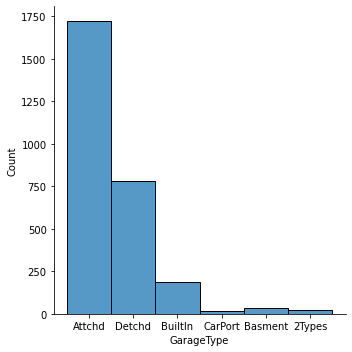

In [42]:
sns.displot(whole_dataset['GarageType'])

In [43]:
# I WILL FILL WITH NONE BECAUSE ACCORDING TO THE DATA SET DESCRIPTION NA MEANS NONE
whole_dataset['GarageType']= whole_dataset['GarageType'].fillna('None')

In [44]:
#for GarageYrBlt
whole_dataset['GarageYrBlt'].describe()

count    2760.000000
mean     1978.113406
std        25.574285
min      1895.000000
25%      1960.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64

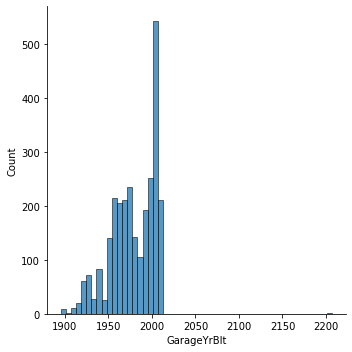

In [45]:
sns.displot(whole_dataset['GarageYrBlt'])


In [46]:
# Chekcing which column has most correlation with GarageYrBlt column
# looking for correlation between gyb and other collumns
whole_dataset.corr()['GarageYrBlt'].nlargest(3)

GarageYrBlt     1.000000
YearBuilt       0.834812
YearRemodAdd    0.652365
Name: GarageYrBlt, dtype: float64

In [47]:
# There is significant coorelation between YearBuilt and GarageYrBlt 
# dropping GarageYrBlt         
whole_dataset = whole_dataset.drop(['GarageYrBlt'],axis = 1)



In [48]:
# for GarageFinish
# I WILL FILL WITH NONE BECAUSE ACCORDING TO THE DATA SET DESCRIPTION NA MEANS NONE
whole_dataset['GarageFinish']= whole_dataset['GarageFinish'].fillna('None')


In [49]:
# for GarageQual
# I WILL FILL WITH NONE BECAUSE ACCORDING TO THE DATA SET DESCRIPTION NA MEANS NONE
whole_dataset['GarageQual']= whole_dataset['GarageQual'].fillna('None')

In [50]:
# for GarageFinish
# I WILL FILL WITH NONE BECAUSE ACCORDING TO THE DATA SET DESCRIPTION NA MEANS NONE
whole_dataset['GarageCond']= whole_dataset['GarageCond'].fillna('None')


OBSERVATIONS: SOME COLUMNS CONTAINING CATEGORICAL DATA BOTH ORRDINAL AND NOMINAL DATA

In [51]:
# This is a list of columns with nominal data 
categorical_columns = ['MSZoning','Street','LotShape','LandContour',
'Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
'Exterior2nd','MasVnrType','Foundation','Heating','CentralAir',
'Electrical','Functional','GarageType','GarageFinish','PavedDrive','SaleType','SaleCondition']


In [52]:
# This is a list of columns with ordinal data
ordinal_columns = ['OverallQual','OverallCond','ExterQual','ExterCond',
'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
'HeatingQC','KitchenQual','GarageCond','GarageQual']


In [53]:
# for categorical data the goal is to transpose the dataset for each category of each column and attach binary values 
whole_dataset = pd.get_dummies(whole_dataset, prefix=categorical_columns, columns=categorical_columns)

In [54]:
whole_dataset.shape

(2919, 238)

In [55]:
# for columns with ordinal data, the solution is to use a label encoder to attach numbers to each level
# the label encoder object
le = preprocessing.LabelEncoder()

In [56]:
for col in ordinal_columns:
    whole_dataset[col]=le.fit_transform(whole_dataset[col])

In [57]:
# separating train dataset and test dataset
X_train = whole_dataset[:1460]

X_test = whole_dataset[1460:]


In [58]:
X_train.shape,X_test.shape

((1460, 238), (1459, 238))

In [59]:
# STANDARDIZING THE DATA
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)


In [60]:
X_train.shape

(1460, 238)

OBSERVATION: We have a lot of columns and it is not clear which contribute to sale price and which do not.

SOLUTION: PCA which is short of principle component analysis that basically shows what parameters are most relevant ro predicting the target/output

In [61]:
# Principle component analysis used to understand the key variables in the data and spot outliers.
pca = PCA(n_components=238) # number of variables
X_train = pca.fit_transform(X_train)
explained_variance = pca.explained_variance_ratio_ 
# explained variance shows how much the price variates based on the parameters chosen

Text(0.5, 1.0, 'Explained Varience')

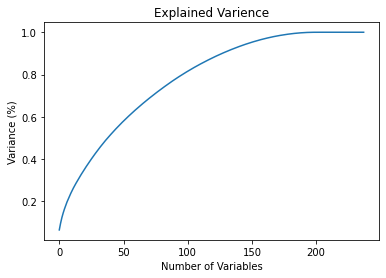

In [63]:

plt.figure()
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Variables')
plt.ylabel('Variance (%)')
plt.title('Explained Varience')

NT: 80% of the variance is explained by 20% of the features

In [66]:
# from the graph we can see that about 200 components are useful

#we will take the 200 columns and put them in a dataframe
relevant_matrix =(pd.concat([pd.DataFrame(list(whole_dataset.columns), columns=["Factors"] ) ,pd.DataFrame(list(explained_variance**2), columns=["^2 Variance"] )] , axis=1).sort_values(by='^2 Variance', ascending = False)[0:200])

In [67]:
list(relevant_matrix['Factors']) 

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_None',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Ut

In [68]:
# create new X dataset with relevant features 
X_rev = whole_dataset[list(relevant_matrix['Factors'])]

In [69]:
X_rev

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr
0,1,60,65.0,8450,6,4,2003,2003,196.0,2,...,0,0,0,1,0,0,0,0,0,1
1,2,20,80.0,9600,5,7,1976,1976,0.0,3,...,0,0,0,1,0,0,0,0,0,1
2,3,60,68.0,11250,6,4,2001,2002,162.0,2,...,0,0,0,1,0,0,0,0,0,1
3,4,70,60.0,9550,6,4,1915,1970,0.0,3,...,0,0,0,1,0,0,0,0,0,1
4,5,60,84.0,14260,7,4,2000,2000,350.0,2,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,21.0,1936,3,6,1970,1970,0.0,3,...,0,0,0,1,0,0,0,0,0,1
2915,2916,160,21.0,1894,3,4,1970,1970,0.0,3,...,0,0,0,1,0,0,0,0,0,1
2916,2917,20,160.0,20000,4,6,1960,1996,0.0,3,...,0,0,0,1,0,0,0,0,0,1
2917,2918,85,62.0,10441,4,4,1992,1992,0.0,3,...,0,0,0,1,0,0,0,0,0,1


In [70]:
# Spilitting dataset again
X_train = X_rev[:1460] 
 
X_test = X_rev[1460:] 

IMPLEMENTATION OF MODEL

I'm making use of an XGBoost regression as it is good for data sets with categorical data. It makes use of a gradient boosting framework.

In [71]:
#CREATE OBJECT FOR XGBREGRESSOR
model = XGBRegressor()

In [72]:
# TRAIN THE MODEL
model = model.fit(X_train, Y_train_dataset)

[21:48:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [73]:
# predict train dataset with model
train_dataset_prediction = model.predict(X_train)


In [74]:
train_dataset_prediction

array([198128.7 , 162753.77, 208192.22, ..., 263687.1 , 135666.56,
       144443.66], dtype=float32)

In [75]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(Y_train_dataset,train_dataset_prediction)

0.9624997478266237

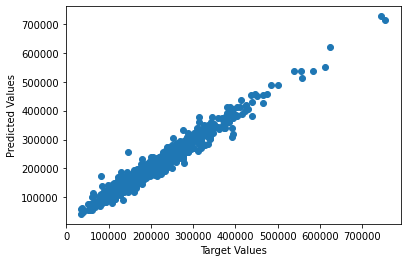

In [76]:
plt.scatter(Y_train_dataset, train_dataset_prediction)
plt.xlabel('Target Values') 
plt.ylabel('Predicted Values')
plt.show()

From the graph you can a line can easily fit in

In [77]:
#predict test_dataset with model
test_dataset_prediction = model.predict(X_test)


In [78]:
test_dataset_prediction

array([122183.86, 157113.06, 169663.22, ..., 172544.34, 119022.4 ,
       235262.58], dtype=float32)

In [79]:
# creating dataframe that will hold submission value
submission=pd.DataFrame()
submission['SalePrice']=test_dataset_prediction
submission = submission.reset_index()
submission = submission.rename(columns={"index":"Id"})
submission['Id'] = submission.index + len(submission)+2
submission

,Id,SalePrice
0,1461,122183.859375
1,1462,157113.062500
2,1463,169663.218750
3,1464,181354.968750
4,1465,190961.828125
...,...,...
1454,2915,81267.023438
1455,2916,88159.406250
1456,2917,172544.343750
1457,2918,119022.398438


In [81]:
submission.to_csv('/content/final_submission_6.csv',index=False)
